PROBLEMA 1

Desarrolle una funci´on que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la
intensidad del color gris de cada pixel.

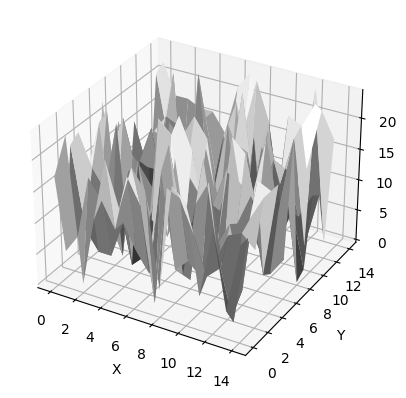

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_grayscale_image_3d(image):

    height, width = image.shape

    x = np.arange(0, width)
    y = np.arange(0, height)
    X, Y = np.meshgrid(x, y)
    Z = image

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, Z, cmap='gray')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad')
    plt.show()

gray_image = np.random.randint(0, 25, size=(15, 15))  # Simulación de una imagen en escala de grises
plot_grayscale_image_3d(gray_image)


Problema 2:
Implemente una funcion para cada una de las transformaciones vistas en clase: negativa, lineal,
logarıtmica y exponencial.

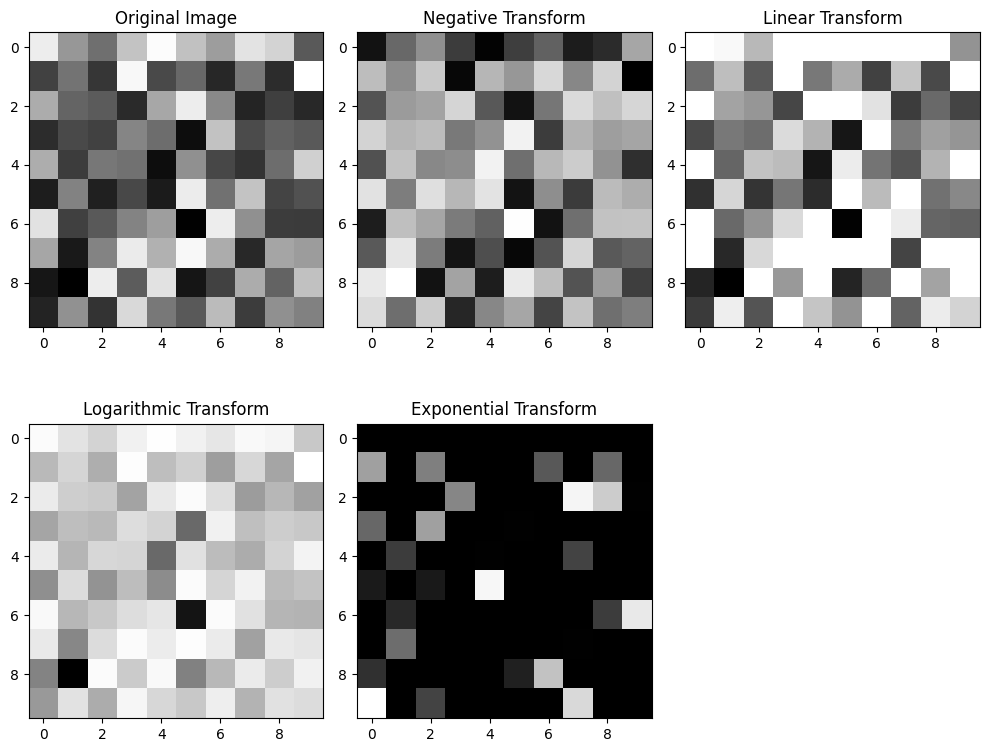

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def negative_transform(image):
    return 255 - image

def linear_transform(image, alpha, beta):
    return np.clip(alpha * image + beta, 0, 255).astype(np.uint8)

def logarithmic_transform(image, c):
    return (c * np.log1p(image)).astype(np.uint8)

def exponential_transform(image, c, gamma):
    return (c * np.power(gamma, image)).astype(np.uint8)

# Ejemplo de uso
gray_image = np.random.randint(0, 256, size=(10, 10), dtype=np.uint8)  # Simulación de una imagen en escala de grises

# Transformación negativa
negative_image = negative_transform(gray_image)

# Transformación lineal
alpha = 1.5
beta = 30
linear_image = linear_transform(gray_image, alpha, beta)

# Transformación logarítmica
c_log = 255 / np.log1p(np.max(gray_image))
logarithmic_image = logarithmic_transform(gray_image, c_log)

# Transformación exponencial
c_exp = 255 / (np.power(np.max(gray_image), 2))
gamma = 1.5
exponential_image = exponential_transform(gray_image, c_exp, gamma)

# Mostrar las imágenes originales y transformadas
plt.figure(figsize=(10, 8))

plt.subplot(231)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(232)
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Transform')

plt.subplot(233)
plt.imshow(linear_image, cmap='gray')
plt.title('Linear Transform')

plt.subplot(234)
plt.imshow(logarithmic_image, cmap='gray')
plt.title('Logarithmic Transform')

plt.subplot(235)
plt.imshow(exponential_image, cmap='gray')
plt.title('Exponential Transform')

plt.tight_layout()
plt.show()


Problema 3:

> Bloque con sangría


Desarrolle una funcion que dada dos imagenes a color, realice las operaciones SUMA, RESTA, AND,
OR , XOR con ambas imagenes recuerde que para realizar las operaciones logicas es necesario pasar
la imagen a escala de grises y luego binarizarla.

Primero agregare el acceso a Google Drive y las imagens cargadas en esa carpeta

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


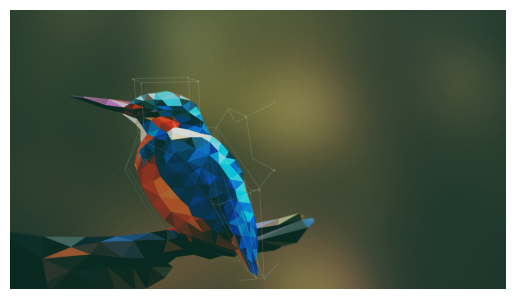

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import drive
drive.mount('/content/drive')

image_path = '/content/drive/MyDrive/Lab2/COLIBRI.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Para ocultar los ejes
plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


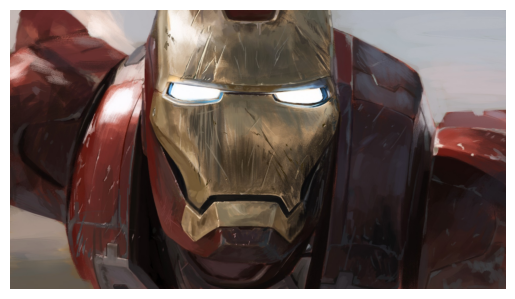

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import drive
drive.mount('/content/drive')

image_path = '/content/drive/MyDrive/Lab2/IRONMAN.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Para ocultar los ejes
plt.show()

Codigo del Problema 3:

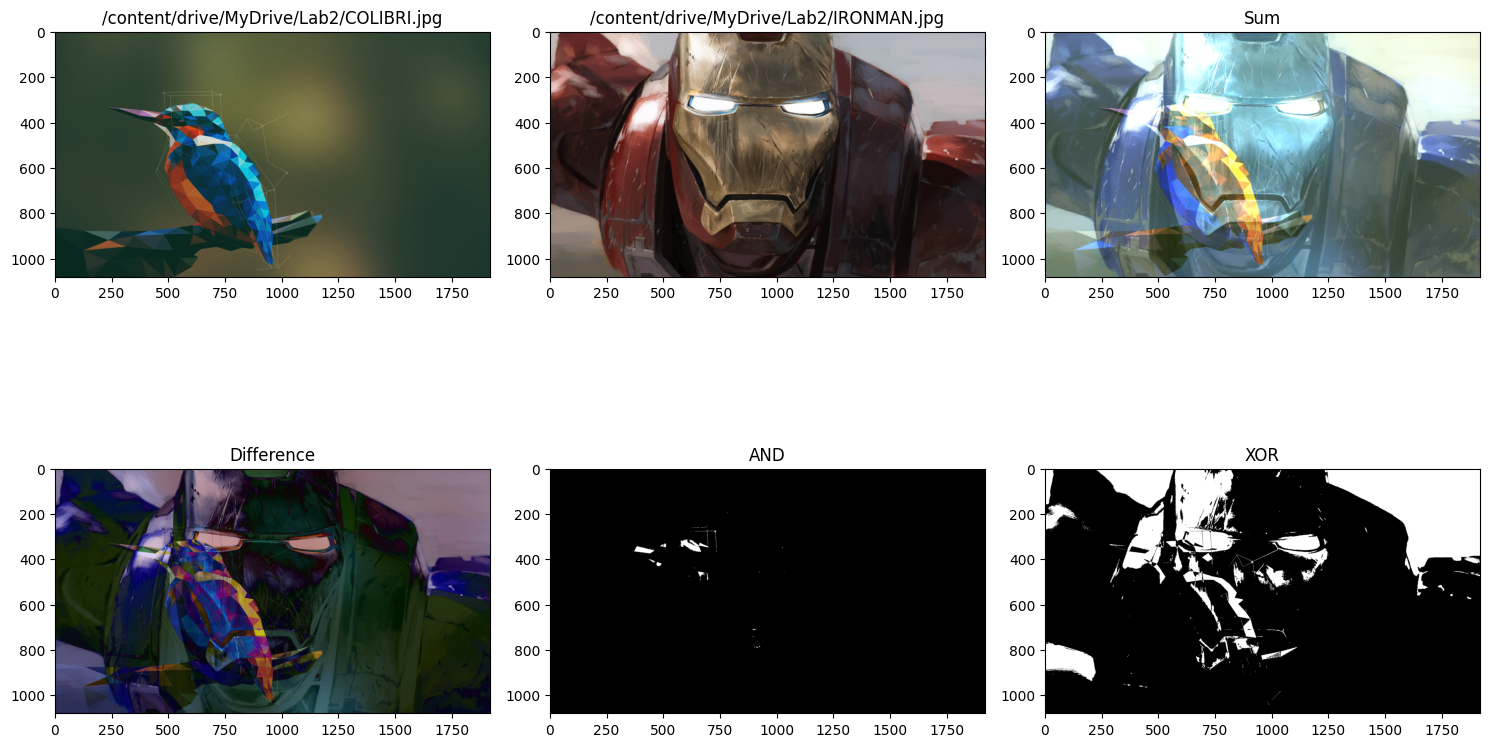

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def color_image_operations(image1, image2):
    # Convertir imágenes a escala de grises
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Convertir las imágenes a blanco y negro
    _, bin_image1 = cv2.threshold(gray_image1, 128, 255, cv2.THRESH_BINARY)
    _, bin_image2 = cv2.threshold(gray_image2, 128, 255, cv2.THRESH_BINARY)

    sum_image = cv2.add(image1, image2)
    diff_image = cv2.absdiff(image1, image2)
    and_image = cv2.bitwise_and(bin_image1, bin_image2)
    or_image = cv2.bitwise_or(bin_image1, bin_image2)
    xor_image = cv2.bitwise_xor(bin_image1, bin_image2)

    # Mostrar imágenes originales y los resultados de las operaciones
    plt.figure(figsize=(15, 10))

    plt.subplot(231)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.title('/content/drive/MyDrive/Lab2/COLIBRI.jpg')

    plt.subplot(232)
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title('/content/drive/MyDrive/Lab2/IRONMAN.jpg')

    plt.subplot(233)
    plt.imshow(sum_image)
    plt.title('Sum')

    plt.subplot(234)
    plt.imshow(diff_image, cmap='gray')
    plt.title('Difference')

    plt.subplot(235)
    plt.imshow(and_image, cmap='gray')
    plt.title('AND')

    plt.subplot(236)
    plt.imshow(xor_image, cmap='gray')
    plt.title('XOR')

    plt.tight_layout()
    plt.show()

# Cargar las imágenes a color
image1 = cv2.imread('/content/drive/MyDrive/Lab2/COLIBRI.jpg')  # Reemplazar con la ruta de la primera imagen
image2 = cv2.imread('/content/drive/MyDrive/Lab2/IRONMAN.jpg')  # Reemplazar con la ruta de la segunda imagen

# Realizar las operaciones en las imágenes a color
color_image_operations(image1, image2)


Problema 4:
Realice una comparacion entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano
para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV
y cualquier imagen, como entregable debe mostrar una comparaciOn entre los tres enfoques con
una tabla donde se muestre las ventajas y desventajas de cada enfoque.

In [20]:
pip install opencv-python


+------------+--------------------------------------------------------------------------+---------------------------------------------------------------+
| Algoritmo  |                                 Ventajas                                 |                          Desventajas                          |
+------------+--------------------------------------------------------------------------+---------------------------------------------------------------+
|   Canny    |            Redujo bastante el ruido, detecta bordes delgados             | Puede perder bordes en áreas con cambio de intensidad gradual |
|   Sobel    |                   Detecta bordes en direcciones X e Y                    |         Sensible al ruido, puede generar bordes falsos        |
| Laplaciano | Detecta bordes en todas las direcciones, útil para detección de esquinas |         Sensible al ruido, puede generar bordes falsos        |
+------------+--------------------------------------------------------------

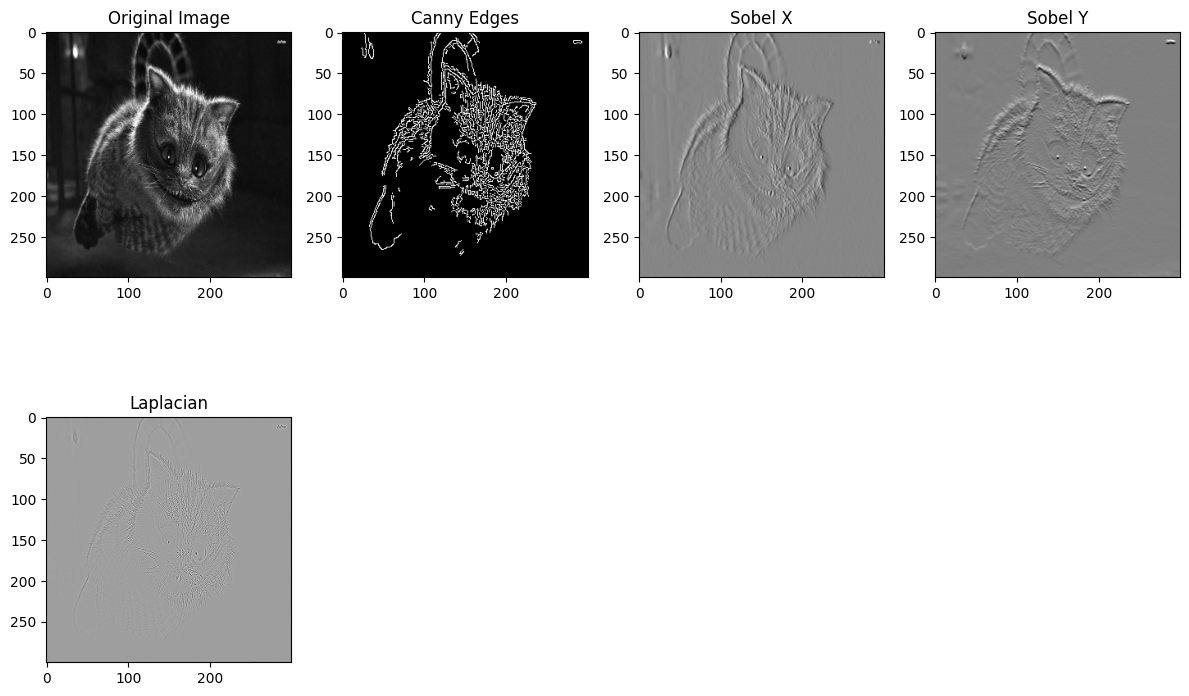

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable  # Para crear la tabla

# Cargar la imagen en escala de grises
image = cv2.imread('/content/drive/MyDrive/Lab2/cat.jpg', cv2.IMREAD_GRAYSCALE)  # Reemplaza 'lena.jpg' con la ruta de tu imagen
image = cv2.resize(image, (300, 300))  # Redimensionar la imagen

# Aplicar los algoritmos de detección de bordes
canny_edges = cv2.Canny(image, threshold1=100, threshold2=200)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Gerenerar Tabla
# Esta tabla fue generada de ultimo para comparar ventajas y desventajas
table = PrettyTable()
table.field_names = ['Algoritmo', 'Ventajas', 'Desventajas']

table.add_row(['Canny', 'Redujo bastante el ruido, detecta bordes delgados', 'Puede perder bordes en áreas con cambio de intensidad gradual'])
table.add_row(['Sobel', 'Detecta bordes en direcciones X e Y', 'Sensible al ruido, puede generar bordes falsos'])
table.add_row(['Laplaciano', 'Detecta bordes en todas las direcciones, útil para detección de esquinas', 'Sensible al ruido, puede generar bordes falsos'])

print(table)

# Mostrar las imágenes originales y los bordes detectados
plt.figure(figsize=(12, 8))

plt.subplot(241)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(242)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edges')

plt.subplot(243)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')

plt.subplot(244)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')

plt.subplot(245)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')

plt.tight_layout()
plt.show()


Utilizando funciones de OpenCV deber´a aplicar los filtros de convoluci´on de taman˜o de kernel (3x3,
5x5 y 7x7) las operaciones que deber´a realizar son las siguientes:
Kernel Gaussiano de riodo.
Kernel Box de ruido.
Kernel de mediana para ruido.
Kernel Sobel para detecci´on de bornes (en X e Y).
Kernel Lapaciano para detecci´on de bordes.
Kernel de realce (Sharpening).
Kernel de relieve (Embossing)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


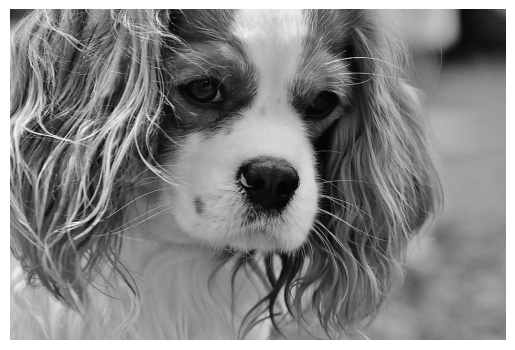

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import drive
drive.mount('/content/drive')

image_path = '/content/drive/MyDrive/Lab2/dog.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Para ocultar los ejes
plt.show()

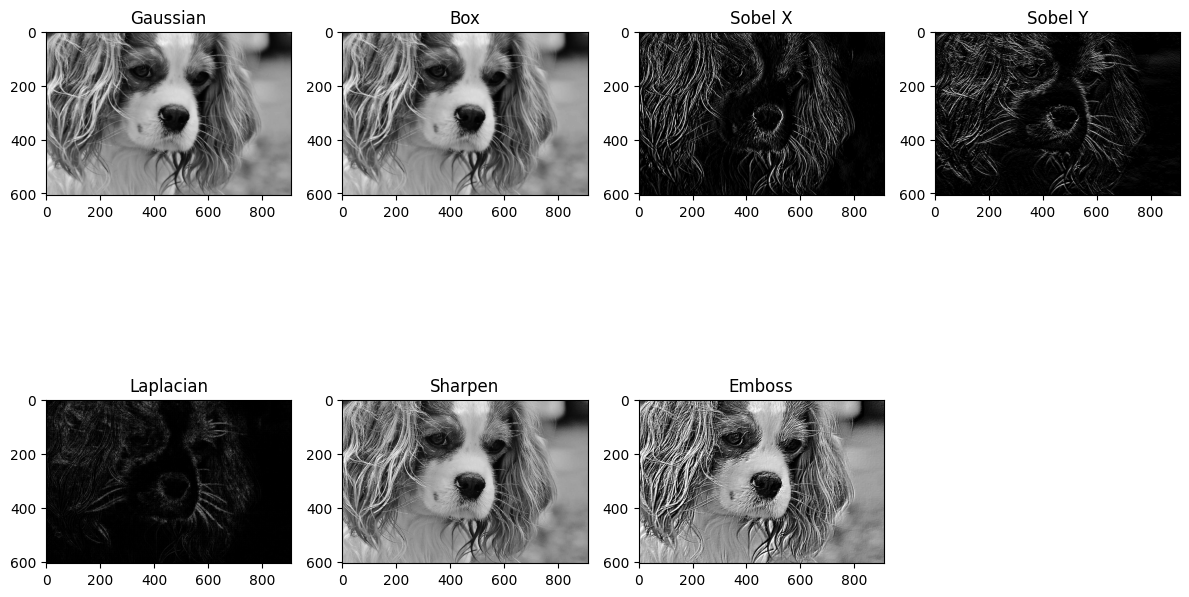

In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = '/content/drive/MyDrive/Lab2/dog.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Definir los diferentes kernels
gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], dtype=np.float32) / 16
box_kernel = np.ones((3, 3), dtype=np.float32) / 9
sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
emboss_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]], dtype=np.float32)

# Aplicar los filtros de convolución
gaussian_filtered = cv2.filter2D(image, -1, gaussian_kernel)
box_filtered = cv2.filter2D(image, -1, box_kernel)
sobel_x_filtered = cv2.filter2D(image, -1, sobel_x_kernel)
sobel_y_filtered = cv2.filter2D(image, -1, sobel_y_kernel)
laplacian_filtered = cv2.filter2D(image, -1, laplacian_kernel)
sharpen_filtered = cv2.filter2D(image, -1, sharpen_kernel)
emboss_filtered = cv2.filter2D(image, -1, emboss_kernel)

# Mostrar las imágenes resultantes
plt.figure(figsize=(12, 8))

plt.subplot(241), plt.imshow(gaussian_filtered, cmap='gray'), plt.title('Gaussian')
plt.subplot(242), plt.imshow(box_filtered, cmap='gray'), plt.title('Box')
plt.subplot(243), plt.imshow(sobel_x_filtered, cmap='gray'), plt.title('Sobel X')
plt.subplot(244), plt.imshow(sobel_y_filtered, cmap='gray'), plt.title('Sobel Y')
plt.subplot(245), plt.imshow(laplacian_filtered, cmap='gray'), plt.title('Laplacian')
plt.subplot(246), plt.imshow(sharpen_filtered, cmap='gray'), plt.title('Sharpen')
plt.subplot(247), plt.imshow(emboss_filtered, cmap='gray'), plt.title('Emboss')

plt.tight_layout()
plt.show()

